In [ ]:
import pandas as pd

# read the csv file
df = pd.read_csv('transactions.csv')

grouped = df.groupby('block_timestamp')['value'].sum().reset_index()

# new file
grouped.to_csv('merged_transactions.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

# read the file
df = pd.read_csv('transactions.csv')

# 
df['value'] = df['value'].astype(float)
total_value = df['value'].sum()
df['pr'] = df['value'] / total_value
H = -df['pr'] * np.log2(df['pr'])
E = H.sum()

# block_timestamp group
grouped = df.groupby('block_timestamp').apply(lambda x: total_value / (E * x['pr'].sum())).reset_index(name='V')

# new file
grouped.to_csv('V_values.csv', index=False)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


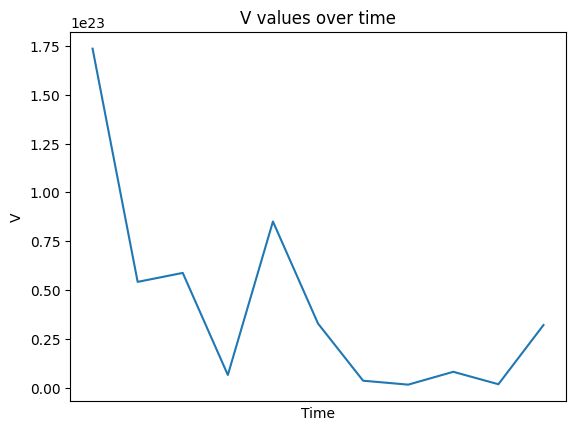

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# read the file
df = pd.read_csv('V_values.csv')

# date type
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])

# set X and Y
x = df['block_timestamp']
y = df['V']

# plot

plt.plot(x, y)
plt.title('V values over time')
plt.xlabel('Time')
plt.ylabel('V')

plt.show()
